# Clustering Project

## Dataset Description

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)


**Recommended Reading for Data Understanding**: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**Acknowledgment**: This dataset was created and published by Yamaç Eren Ay on Kaggle.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [72]:
df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2022/main/data/music_genres.csv')
df.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


# **Data Cleaning**

In [73]:
df.info()
#we make sure the data types are correct and no changes are required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [74]:
df.isnull().sum()
#checking if there are null values

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

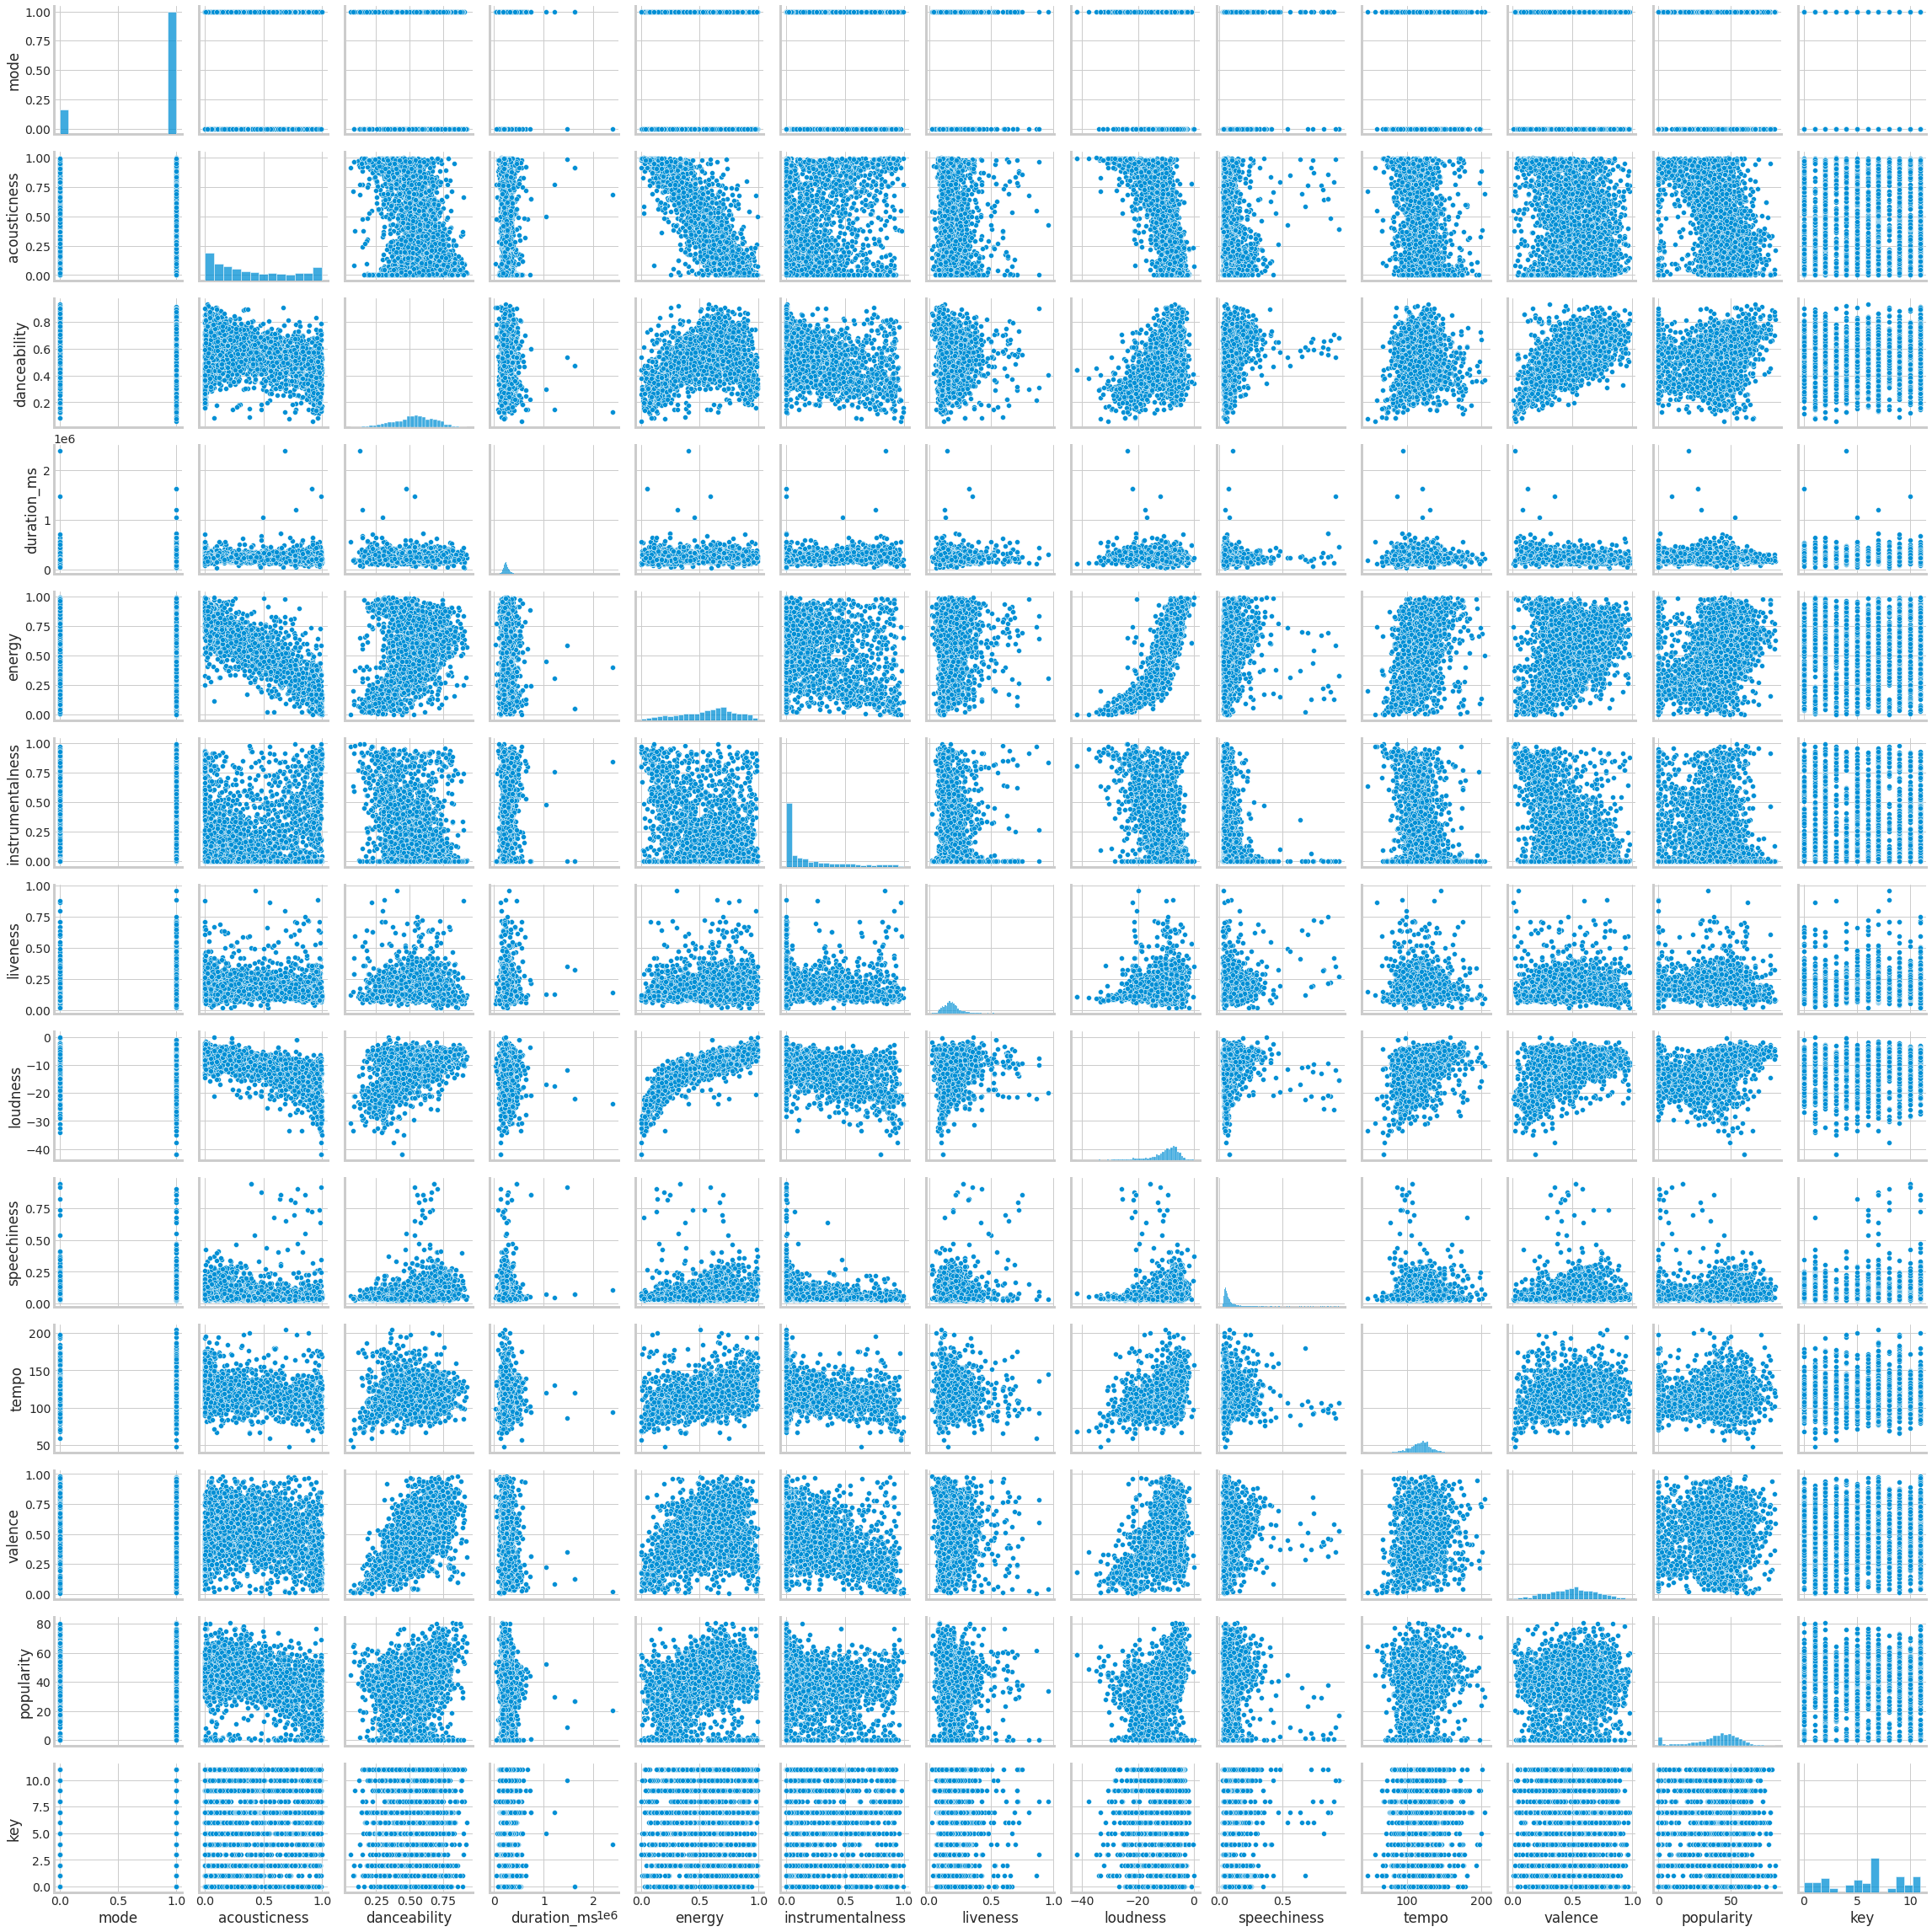

In [75]:
#to take a look at the relationship between different attributes and make an estimate, we create a pairplot
sns.pairplot(df)
plt.show()

In [76]:
df ['duration_ms']=df['duration_ms'].astype(int)
#changing its type from boolean to integer

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   int64  
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 325.3+ KB


# **Visualization**


**1. What are the 5 most popular music genres**







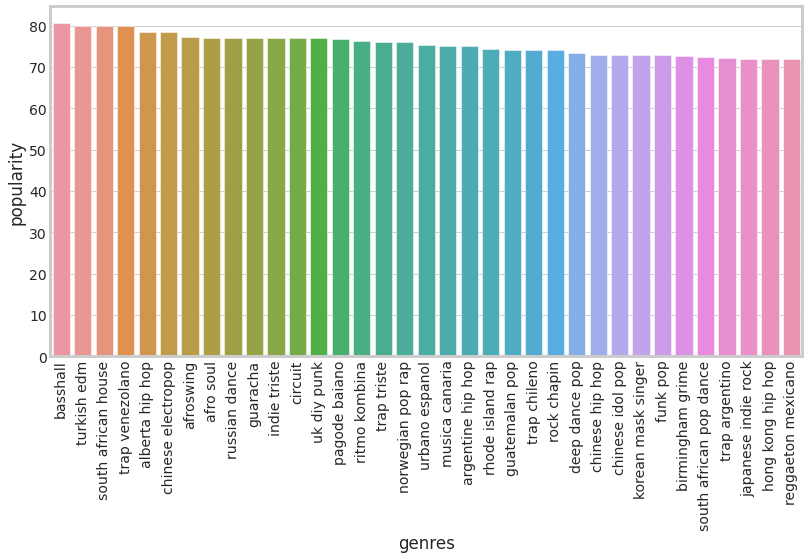

In [78]:
sorted=df.sort_values(by='popularity', ascending=False)[['genres', 'popularity']].head(35)
plt.figure(figsize=(12,6))
sns.barplot(x='genres', y='popularity', data=sorted)
plt.xticks(rotation=90)
plt.show()
#sorting the df by popularity in descending order and retrieve the first 35 values


**Answer of Q1**: From the above visualization, the top 5 most popular music genres are:

1.basshall
2.turkish edm
3.south african house
4.trap venezolano
5.alberta hip hop


**2. What factors affect the Popularity of the song ? (Mention the biggest 2 factors, with interpretation)**

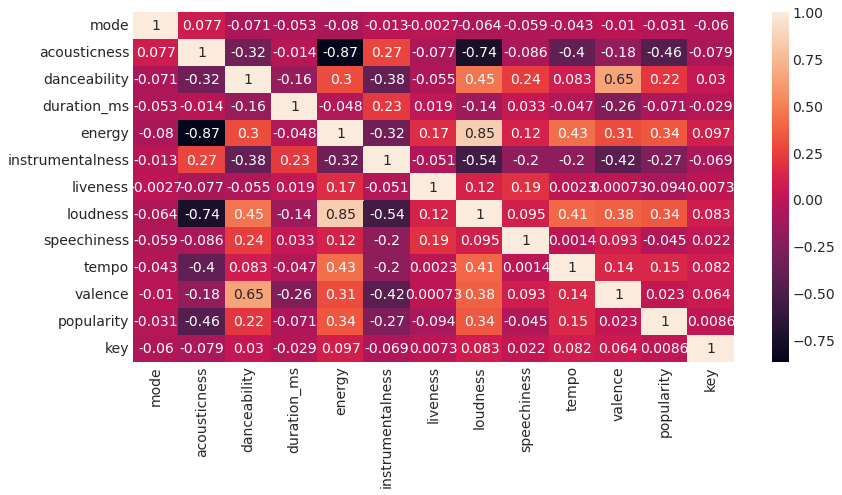

In [79]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()
#creating a heatmap that visualizes the correlations between different columns with popularity.

**Answer for Q2**: The columns most affecting popularity are loudness (0.34) and acousticness(-0.46). The higher the loudness, the more popular a song is and the higher the acousticness of a song, the less popular it is.


**3. Which genre has the highest energy and which has the lowest?**


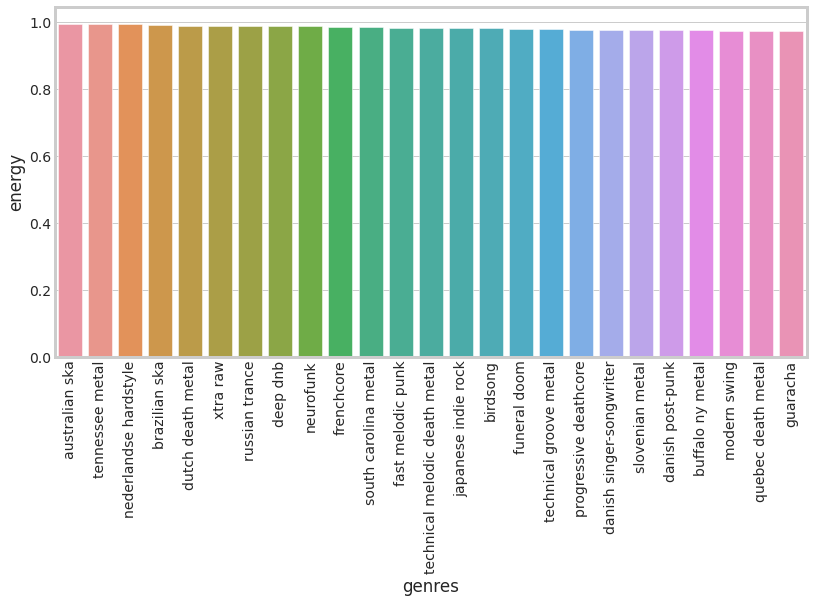

In [113]:
result=df.sort_values(by='energy', ascending=False)[['genres', 'energy']].head(25)
plt.figure(figsize=(12,6))
sns.barplot(x='genres', y='energy', data=result)
plt.xticks(rotation=90)
plt.show()


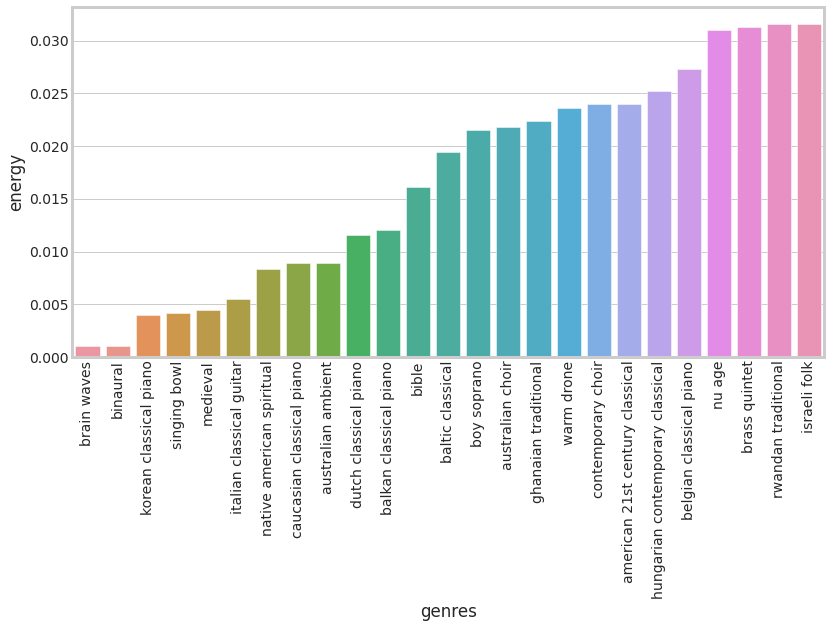

In [114]:
result=df.sort_values(by='energy', ascending=True)[['genres', 'energy']].head(25)
plt.figure(figsize=(12,6))
sns.barplot(x='genres', y='energy', data=result)
plt.xticks(rotation=90)
plt.show()

**Answer of Q3:**
Regarding the highest energy, we did it in descending order, hence australian ska is the genre with the highest energy.
Regarding the lowest energy, we tried finding it in ascending order, hence brain waves is the genre with the lowest energy.


**4. What are the most correlated pairs of attributes ?**

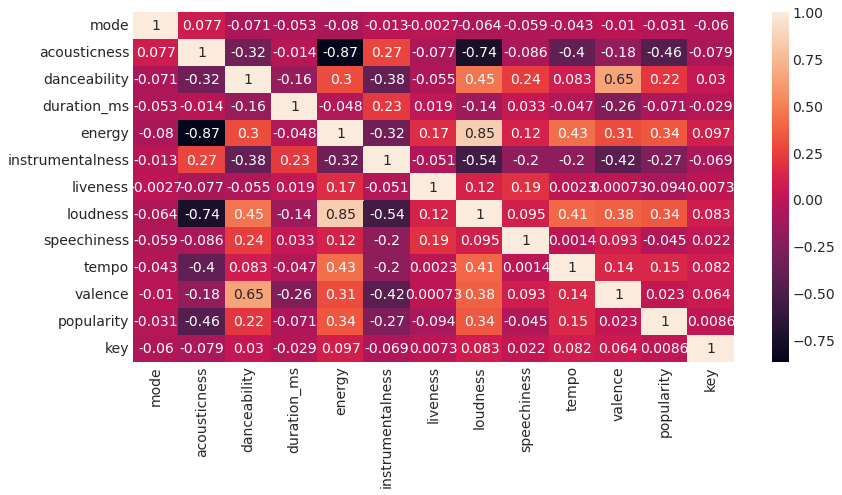

In [81]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)
plt.show()
#we created a heatmap to find what are the most correlated pairs of attributes


**Answer of Q4:** 

Since acousticness and energy are negatively correlated, they tend to move in the opposite way as one changes or rises.
Since loudness and energy are positively correlated, when one changes or decreases, the other tends to move in the same direction.
The significance of both correlations (-0.87) and (0.85)

**Bonus**

**5. Plot the words frequency in genres. Which main genre categories have the most sub-genres? (mention
at least 3)**

Text(0.5, 1.0, 'Genres vs Frequency')

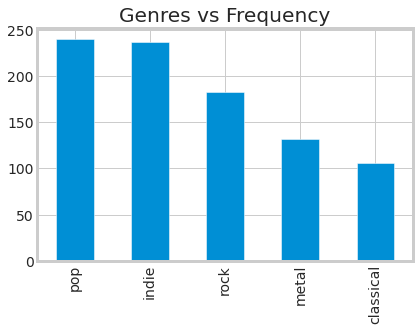

In [82]:
df_top= pd.Series(np.concatenate([x.split() for x in df.genres])).value_counts()[:5]
df_top.plot.bar()
plt.title('Genres vs Frequency')

# ***Data preparation for modeling***

In [83]:
df_encode = df[['mode', 'acousticness', 'danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','popularity','key']].copy()
df_encode.head()


,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,0.979333,0.162883,160297,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,0.494780,0.299333,1048887,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,0.762000,0.712000,115177,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,0.651417,0.529093,232880,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,0.676557,0.538961,190628,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [84]:
#Normalization to fit the data in a certain range to make it easier for clustering
numerical_columns = ['mode', 'acousticness', 'danceability','duration_ms','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','popularity','key']


df_encode[numerical_columns] = ( 
    
    df_encode[numerical_columns] - df_encode[numerical_columns].min()  
    
) /( 
    
    df_encode[numerical_columns].max() - df_encode[numerical_columns].min()
)


df_encode.head()

,mode,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1.0,0.983266,0.121527,0.055005,0.070763,0.611727,0.361911,0.246166,0.018177,0.179536,0.102832,0.345041,0.545455
1,1.0,0.496766,0.277988,0.432864,0.452544,0.481615,0.116016,0.596180,0.057476,0.465697,0.223620,0.650826,0.454545
2,1.0,0.765060,0.751175,0.035818,0.822207,0.883065,0.110685,0.779396,0.025151,0.549467,0.994880,0.595041,0.636364
3,1.0,0.654032,0.541443,0.085869,0.420810,0.206965,0.209529,0.705170,0.091143,0.418406,0.522452,0.258594,0.636364
4,1.0,0.679274,0.552759,0.067902,0.317443,0.003028,0.160007,0.700623,0.064018,0.413650,0.455534,0.568017,0.636364


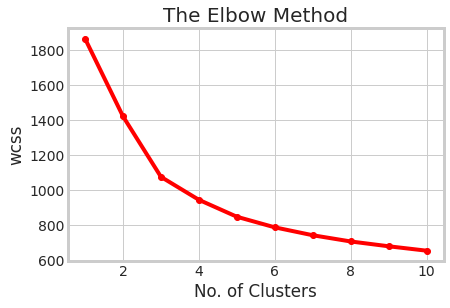

In [85]:
from sklearn.cluster import KMeans

# We try out different number of clusters incrementally
# From 1 till 10
# 10 was chosen as the upper limit since there doesn't seem to be many clusters present in the data
# as per the pairplot
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(df_encode)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


 **Clustering Model**

In [86]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(df_encode)

# Get the cluster labels for the fitted data
labels = km.labels_
labels

array([2, 2, 0, ..., 1, 3, 4], dtype=int32)

In [87]:
# We'll assign the cluster labels to a new column called 'cluster' in our original dataframe
df['cluster'] = labels



In [88]:
C0=df[df['cluster']==0][['genres', 'cluster']]
C0.sample(n=5,random_state=1)


,genres,cluster
2851,vaudeville,0
1705,mande pop,0
1953,new weird america,0
2577,spiritual jazz,0
2678,taiwan indie,0


In [89]:
C1=df[df['cluster']==1][['genres', 'cluster']]
C1.sample(n=5,random_state=1)

,genres,cluster
2572,spanish techno,1
1295,hip pop,1
120,arkansas indie,1
2310,reading indie,1
441,canadian metalcore,1


In [90]:
C2=df[df['cluster']==2][['genres', 'cluster']]
C2.sample(n=5,random_state=1)

,genres,cluster
935,early romantic era,2
2820,ukrainian choir,2
629,classical,2
2366,romanian folk,2
643,classical mezzo-soprano,2


In [91]:
C3=df[df['cluster']==3][['genres', 'cluster']]
C3.sample(n=5,random_state=1)

,genres,cluster
1335,icelandic electronic,3
1423,iskelma,3
2778,turkish edm,3
1480,j-reggae,3
398,buffalo hip hop,3


In [92]:
C4=df[df['cluster']==4][['genres', 'cluster']]
C4.sample(n=5,random_state=1)

,genres,cluster
794,deep ccm,4
2622,swedish death metal,4
1377,indie shoegaze,4
2405,sad rap,4
1968,noise pop,4


**Cluster Interpretation**

In [93]:
# You can avoid pandas' output truncation by setting the four options below.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df.groupby('cluster').describe()

mode                                              acousticness  \
         count      mean       std  min  25%  50%  75%  max        count   
cluster                                                                    
0        594.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0        594.0   
1        590.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0        590.0   
2        379.0  0.915567  0.278403  0.0  1.0  1.0  1.0  1.0        379.0   
3        464.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0        464.0   
4        946.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0        946.0   

                                                                             \
             mean       std       min       25%       50%       75%     max   
cluster                                                                       
0        0.713735  0.154287  0.277575  0.588519  0.704513  0.834542  0.9944   
1        0.197741  0.162393  0.000007  0.060451  0.171257  0.291273  0.8010   
2        0.856035  0.159739  0.080664  0.798159  0.915333  0.965260  0.9960   
3        0.305557  0.291863  0.000003  0.057235  0.201606  0.516539  0.9930   
4        0.196668  0.147194  0.000003  0.067633  0.171456  0.311666  0.6355   

        danceability                                                  \
               count      mean       std     min       25%       50%   
cluster                                                                
0              594.0  0.537745  0.097804  0.1460  0.487159  0.541038   
1              590.0  0.582937  0.139709  0.1980  0.483385  0.595140   
2              379.0  0.339191  0.114722  0.0569  0.272655  0.328667   
3              464.0  0.578316  0.159601  0.1230  0.470650  0.583032   
4              946.0  0.567455  0.129242  0.1810  0.481632  0.568000   

                          duration_ms                                         \
              75%     max       count           mean            std      min   
cluster                                                                        
0        0.596872  0.8300       594.0  227274.855219   72602.847171  45004.0   
1        0.696455  0.8970       590.0  254503.674576   64829.657636  87960.0   
2        0.397547  0.7645       379.0  297729.303430  184853.857844  72187.0   
3        0.699417  0.9290       464.0  254919.400862   96529.441739  42813.0   
4        0.664066  0.9110       946.0  245332.431290   52368.236914  30946.0   

                                                   energy                      \
               25%       50%        75%        max  count      mean       std   
cluster                                                                         
0        184154.75  214815.0  250383.75   733455.0  594.0  0.389075  0.134322   
1        216583.50  244053.0  277158.25   624933.0  590.0  0.689564  0.139295   
2        209219.50  268262.0  346217.00  2382586.0  379.0  0.192648  0.118690   
3        206022.75  240402.0  288913.50  1469283.0  464.0  0.635868  0.209062   
4        215188.00  239028.5  269548.00   566467.0  946.0  0.700072  0.130496   

                                                          instrumentalness  \
              min       25%       50%       75%       max            count   
cluster                                                                      
0        0.021800  0.304941  0.387782  0.465417  0.828076            594.0   
1        0.254702  0.594276  0.683546  0.787162  0.989000            590.0   
2        0.001002  0.110589  0.177000  0.239079  0.662663            379.0   
3        0.016100  0.491250  0.663774  0.808662  0.994667            464.0   
4        0.235000  0.606986  0.690410  0.791908  0.994333            946.0   

                                                                               \
             mean       std       min       25%       50%       75%       max   
cluster                                                                         
0        0.134417  0.163681  0.00

In [94]:
df.groupby('cluster').describe(include='object')

genres                                    
         count unique                     top freq
cluster                                           
0          594    594                   8-bit    1
1          590    590        abstract hip hop    1
2          379    379  21st century classical    1
3          464    464               accordeon    1
4          946    946          abstract beats    1

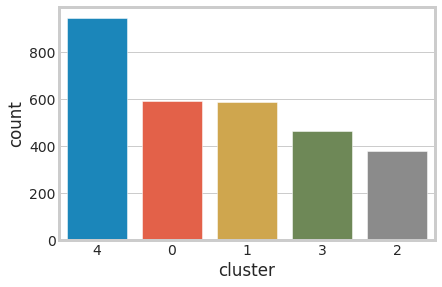

In [95]:
sns.countplot(x='cluster', data=df, order=df['cluster'].value_counts().index)
plt.show()

We then use boxplots to look into the attributes of each cluster and examine the attributes of of the constituents of every cluster.

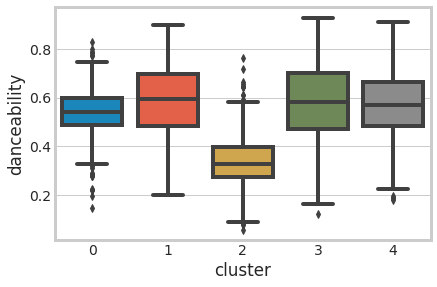

In [96]:
sns.boxplot(x='cluster', y='danceability', data=df)

 All clusters tend to average the same except cluster 2 which tends to have genres that are lower in dancebility.

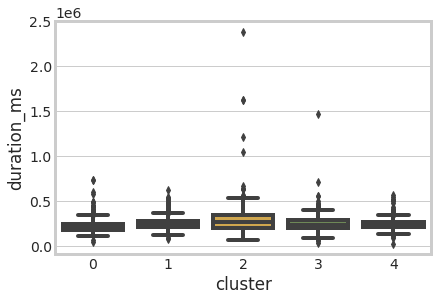

In [97]:
sns.boxplot(x='cluster', y='duration_ms', data=df)

All clusters tend to have almost the same duration_ms although cluster 2 also seems like it has a higher distribution

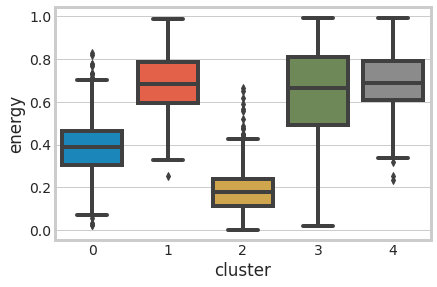

In [98]:
sns.boxplot(x='cluster', y='energy', data=df)

Clusters 0 and 2 tend to have lower energies than the other clusters.

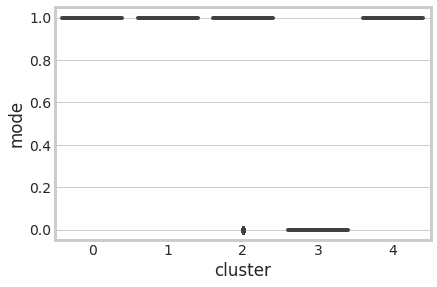

In [99]:
sns.boxplot(x='cluster', y='mode', data=df)

We find that all clusters have a mode of 1 except cluster 3 which tends to have a mode of 0.

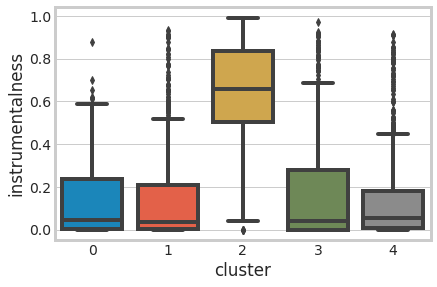

In [100]:
sns.boxplot(x='cluster', y='instrumentalness', data=df)

Cluster 2 has much higher instrumentalness than the rest of the clusters.

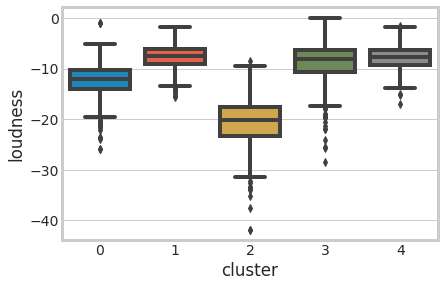

In [101]:
sns.boxplot(x='cluster', y='loudness', data=df)

Cluster 2 tends to have a lower loudness then other clusters

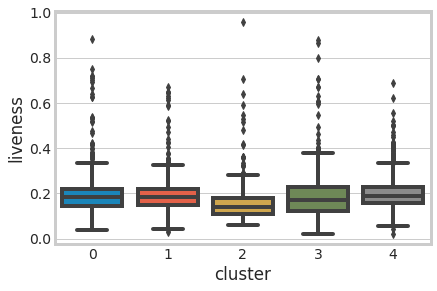

In [102]:
sns.boxplot(x='cluster', y='liveness', data=df)

All clusters tend to have almost the same liveness.

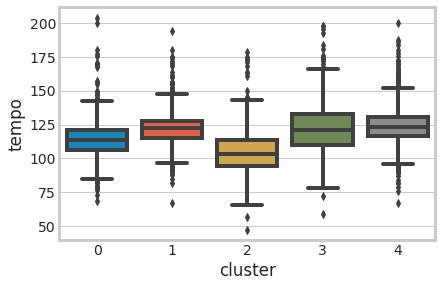

In [103]:
sns.boxplot(x='cluster', y='tempo', data=df)

All clusters tend to have the same tempo.

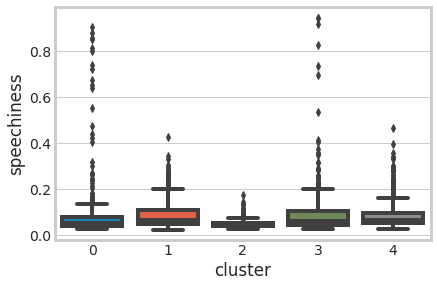

In [104]:
sns.boxplot(x='cluster', y='speechiness', data=df)

All clusters tend to have the same average speechiness although clusters 0 and 3 have a lot of outliers that are greater than average.

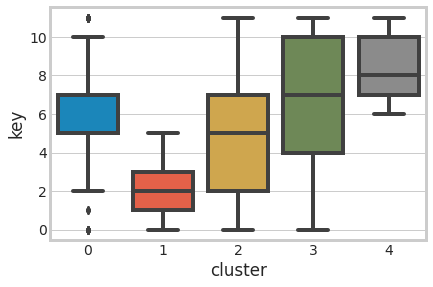

In [105]:
sns.boxplot(x='cluster', y='key', data=df)

Cluster 1 is the cluster with the lowest key values.

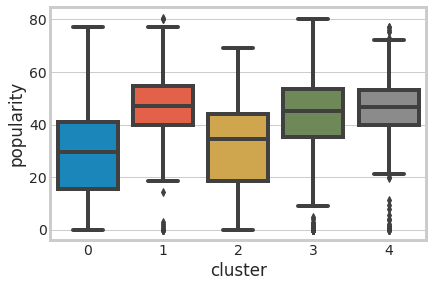

In [106]:
sns.boxplot(x='cluster', y='popularity', data=df)

Cluster 0 seems like the cluster that holds genres that are less popular

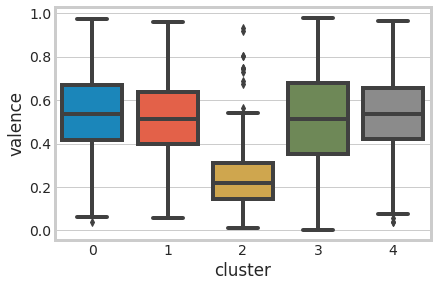

In [107]:
sns.boxplot(x='cluster', y='valence', data=df)

Cluster 2 has a lower average valence than the other clusters.

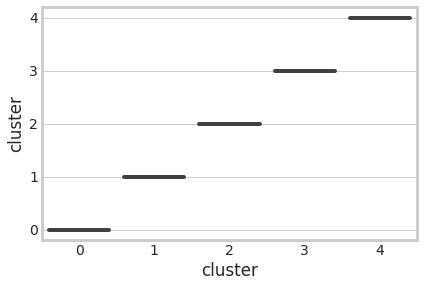

In [109]:
sns.boxplot(x='cluster', y='cluster', data=df)

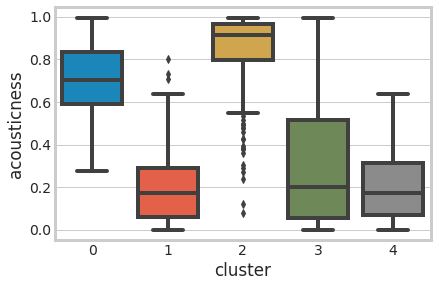

In [110]:
sns.boxplot(x='cluster', y='acousticness', data=df)

 Acousticness in cluster 2 tends to be higher eventhough it does have many outliers that are of lower values